In [2]:
# Apprentissage Supervisé

Valeur cible 1 :  id_code_insee  -  8258
Valeur cible 2 :  Num_Acc  -  40250
Valeur cible 3 :  num_veh  -  58
Valeur cible 4 :  id_usa  -  73643
Valeur cible 5 :  date  -  29950
Valeur cible 6 :  ville  -  8078
Valeur cible 7 :  latitude.x  -  1253
Valeur cible 8 :  longitude.x  -  1495
Valeur cible 9 :  descr_cat_veh  -  24
Valeur cible 10 :  descr_agglo  -  2
Valeur cible 11 :  descr_athmo  -  9
Valeur cible 12 :  descr_lum  -  5
Valeur cible 13 :  descr_etat_surf  -  9
Valeur cible 14 :  description_intersection  -  9
Valeur cible 15 :  an_nais  -  101
Valeur cible 16 :  age  -  101
Valeur cible 17 :  place  -  10
Valeur cible 18 :  descr_dispo_secu  -  15
Valeur cible 19 :  descr_grav  -  4
Valeur cible 20 :  descr_motif_traj  -  6
Valeur cible 21 :  descr_type_col  -  7
Valeur cible 22 :  department_name  -  89
Valeur cible 23 :  department_number  -  89
Valeur cible 24 :  region_name  -  17
Nombre d'instances :  73643


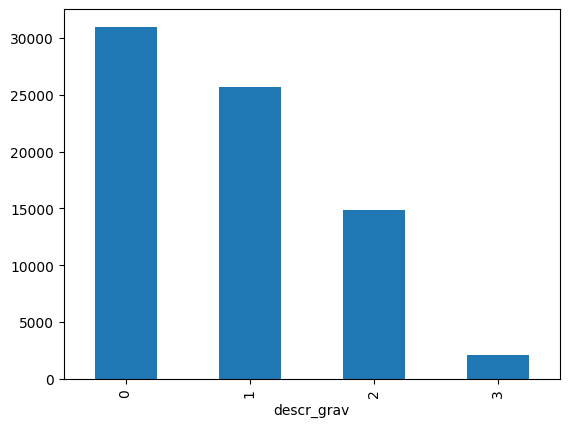

Taille des features :  23
  id_code_insee       Num_Acc num_veh  id_usa            date  \
0         10100  200900035904     A01  823507  20090803130000   
1         10100  200900004313     A01  752937  20090227223000   
2         10102  200900005197     A01  754945  20090113160000   
3         10102  200900005197     B02  754947  20090113160000   
4         10102  200900005206     A01  754970  20090209201500   

              ville  latitude.x  longitude.x  descr_cat_veh  descr_agglo  ...  \
0            CLEREY     48.2000          4.2              2            1  ...   
1            CLEREY     48.2000          4.2              3            2  ...   
2  COLOMBE LA FOSSE     48.2667          4.8              3            2  ...   
3  COLOMBE LA FOSSE     48.2667          4.8              3            2  ...   
4  COLOMBE LA FOSSE     48.2667          4.8              6            2  ...   

   an_nais   age  place                         descr_dispo_secu  descr_grav  \
0   1952.0  57.0

In [42]:
%run preparation.ipynb
data = dataframe

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73643 entries, 0 to 73642
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_code_insee             73643 non-null  int32  
 1   Num_Acc                   73643 non-null  int64  
 2   id_usa                    73643 non-null  int64  
 3   date                      73643 non-null  Int64  
 4   latitude.x                73643 non-null  float64
 5   longitude.x               73643 non-null  float64
 6   descr_cat_veh             73643 non-null  int64  
 7   descr_agglo               73643 non-null  int64  
 8   descr_athmo               73643 non-null  int64  
 9   descr_lum                 73643 non-null  int64  
 10  descr_etat_surf           73643 non-null  int64  
 11  description_intersection  73643 non-null  int64  
 12  an_nais                   73643 non-null  float64
 13  age                       73643 non-null  float64
 14  place 

In [44]:
data = data.drop("id_code_insee", axis='columns')
data = data.drop("Num_Acc", axis='columns')
data = data.drop("id_usa", axis='columns')
data = data.drop("date", axis='columns')
data = data.drop("latitude.x", axis='columns')
data = data.drop("longitude.x", axis='columns')
data = data.drop("an_nais", axis='columns')
data = data.drop("description_intersection", axis='columns')
data = data.drop("descr_motif_traj", axis='columns')
data = data.drop("department_number", axis='columns')
data = data.drop("region_number", axis='columns')
data = data.drop("place", axis='columns')
#Copie de la table initiale Data afin de la garder intacte pour des tests ulterieurs
copy_data = data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73643 entries, 0 to 73642
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   descr_cat_veh     73643 non-null  int64  
 1   descr_agglo       73643 non-null  int64  
 2   descr_athmo       73643 non-null  int64  
 3   descr_lum         73643 non-null  int64  
 4   descr_etat_surf   73643 non-null  int64  
 5   age               73643 non-null  float64
 6   descr_dispo_secu  73643 non-null  int64  
 7   descr_grav        73643 non-null  int64  
 8   descr_type_col    73643 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 5.1 MB


In [24]:

#Importation des librairies
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#data =pandas.read_csv("export_IA.csv", sep=",")

#data.info()
data.head(5)

,descr_cat_veh,descr_agglo,descr_athmo,descr_lum,descr_etat_surf,age,descr_dispo_secu,descr_grav,descr_type_col
0,2,1,4,2,4,57.0,0,0,0
1,3,2,4,3,4,57.0,0,2,1
2,3,2,5,2,4,40.0,0,2,2
3,3,2,5,2,4,70.0,0,0,2
4,6,2,6,1,3,43.0,1,1,3


In [39]:
import pandas as pandas
#CREATION D"UN ECHANTILLOn AFIN DE REALISER DES TESTS DE GRIDSEARCH
sample = data
#sample.info()
count1 = sum(sample['descr_grav'] == 0)
count2 = sum(sample['descr_grav'] == 1)
count3 = sum(sample['descr_grav'] == 2)
count4 = sum(sample['descr_grav'] == 3)
#print(count1,count2,count3,count4, count1+count2+count3+count4)

#Choix du pourcentage de l'échantillon par rapport a la tabe initiale: ici 4% (0.04)
sample_size = 0.04
sample1 = sample.query('descr_grav == 0').sample(n=int(count1 * sample_size), random_state=25)
sample2 = sample.query('descr_grav == 1').sample(n=int(count2 * sample_size), random_state=25)
sample3 = sample.query('descr_grav == 2').sample(n=int(count3 * sample_size), random_state=25)
sample4 = sample.query('descr_grav == 3').sample(n=int(count4 * sample_size), random_state=25)
final_sample = pandas.concat([sample1, sample2, sample3, sample4])
#final_sample.info()
sample_target = final_sample.pop('descr_grav')
sample_target.info()
X_train_sample, X_test_sample,y_train_sample, y_test_sample = train_test_split(final_sample,sample_target, test_size=0.2, random_state=25)


<class 'pandas.core.series.Series'>
Index: 2944 entries, 30308 to 65689
Series name: descr_grav
Non-Null Count  Dtype
--------------  -----
2944 non-null   int64
dtypes: int64(1)
memory usage: 46.0 KB


In [40]:

#Recuperation de la valeur qui va nous servir de targer: la gravité de l'accident
target = data.pop("descr_grav")


In [27]:
#Librairies utiles aux 3 classifications:
#SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score





In [30]:
svm = SVC()
rf = RandomForestClassifier()
mlp = MLPClassifier()

#Creation de vecteurs afin de stocker les scores de chaque jeu de données
average_SVM = []
average_RF = []
average_MLP = []

for i in range(5):
    X_train, X_test,y_train, y_test = train_test_split(data,target, test_size=0.2, random_state=i*10)
    svm.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    mlp.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    y_pred_rf = rf.predict(X_test)
    y_pred_mlp = mlp.predict(X_test)
    print("Jeu de donné ", i+1)
    score_svm = accuracy_score(y_test, y_pred_svm)
    score_rf = accuracy_score(y_test, y_pred_rf)
    score_mlp = accuracy_score(y_test, y_pred_mlp)
    print("Accuracy SVM:", score_svm)
    average_SVM.append(score_svm)
    average_RF.append(score_rf)
    average_MLP.append(score_mlp)
    print("Accuracy RF:", score_rf)
    print("Accuracy MLP:", score_mlp)
    print("")


print("Moyenne SVM:", np.mean(average_SVM))
print("Moyenne RF:", np.mean(average_RF))
print("Moyenne MLP:", np.mean(average_MLP))

Jeu de donné  1
Accuracy SVM: 0.5583542670921312
Accuracy RF: 0.5656188471722452
Accuracy MLP: 0.5950166338515853

Jeu de donné  2
Accuracy SVM: 0.5416525222350465
Accuracy RF: 0.5593726661687827
Accuracy MLP: 0.5844252834544097

Jeu de donné  3
Accuracy SVM: 0.5518365130015616
Accuracy RF: 0.5605947450607645
Accuracy MLP: 0.6026206802905832

Jeu de donné  4
Accuracy SVM: 0.5412451626043859
Accuracy RF: 0.5603231719736574
Accuracy MLP: 0.5931835155136126



c:\Users\Antonin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Jeu de donné  5
Accuracy SVM: 0.5466087310747505
Accuracy RF: 0.5593047728970059
Accuracy MLP: 0.5929119424265056

Moyenne SVM: 0.5479394392015752
Moyenne RF: 0.5610428406544912
Moyenne MLP: 0.5936316111073393


In [21]:
#Leave one out
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(data)
for train_index, test_index in loo.split(data):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]




In [64]:
svm = SVC()
rf = RandomForestClassifier()
mlp = MLPClassifier()
 
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
mlp.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_mlp = mlp.predict(X_test)
print("Jeu de donné a partir du Leave One Out :")
score_svm = accuracy_score(y_test, y_pred_svm)
score_rf = accuracy_score(y_test, y_pred_rf)
score_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy SVM:", score_svm)
print("Accuracy RF:", score_rf)
print("Accuracy MLP:", score_mlp)

Jeu de donné a partir du Leave One Out :
Accuracy SVM: 1.0
Accuracy RF: 1.0
Accuracy MLP: 1.0


In [45]:
#From scratch

#On melange les donnees de copy_data
copy_data = copy_data.sample(frac=1)

#On recupere le nombre de lignes de copy_data afin de savoir combien de lignes on va mettre dans le train set et dans le test set pour 80% de train et 20% de test
total_rows = len(copy_data)
train_size = int(total_rows*0.8)

#Separation des donnees entre train et test
X_train = copy_data[0:train_size]
X_test = copy_data[train_size:]

#Separation des donnees entre X et y
y_train = X_train.pop('descr_grav')
y_test = X_test.pop('descr_grav')


In [46]:
#Test de l'algorithm from scratch
svm = SVC()
rf = RandomForestClassifier()
mlp = MLPClassifier()
 
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
mlp.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_mlp = mlp.predict(X_test)
print("Jeu de donné from Scratch :")
score_svm = accuracy_score(y_test, y_pred_svm)
score_rf = accuracy_score(y_test, y_pred_rf)
score_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy SVM:", score_svm)
print("Accuracy RF:", score_rf)
print("Accuracy MLP:", score_mlp)

Jeu de donné from Scratch :
Accuracy SVM: 0.5477629166949556
Accuracy RF: 0.5650078077262544
Accuracy MLP: 0.5900604250118813


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

# Definition de la grille pour le  GridSearch
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}

# Creation de l'instance de classification SVM
svm = SVC()

# Creation du GridSearch avec le SVM et le param_grid
grid_search_svm = GridSearchCV(svm, param_grid_svm)

# Entrainement du modele
grid_search_svm.fit(X_train_sample, y_train_sample)


# Recuperation du meilleur parametre et de l'estimateur
best_params_svm = grid_search_svm.best_params_
best_model_svm = grid_search_svm.best_estimator_
joblib.dump(best_model_svm, 'best_model_svm.pkl')#Souvegarde du modele
loaded_model_svm = joblib.load('best_model_svm.pkl') #Chargement du modele enregistre
# Prediction sur le modele
y_pred_svm = loaded_model_svm.predict(X_test_sample)

# Evaluation des performances du modele
print("Meilleures parametres SVM:", best_params_svm)
print("Meilleur estimateur: ", best_model_svm)
accuracy_svm = accuracy_score(y_test_sample, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
precision = precision_score(y_test_sample, y_pred_svm, average='weighted')
print("Precision:", precision)
recall = recall_score(y_test_sample, y_pred_svm, average='weighted')
print("Recall:", recall)
f1 = f1_score(y_test_sample, y_pred_svm, average='weighted')
print("F1 Score:", f1)
confusion_mat = confusion_matrix(y_test_sample, y_pred_svm)
print("Matrice de confusion :\n", confusion_mat)
results = grid_search_svm.cv_results_
df_results = pd.DataFrame(results)
print(df_results)


Meilleures parametres SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Meilleur estimateur:  SVC(C=10)
SVM Accuracy: 0.5449915110356537
Precision: 0.5070794374471712
Recall: 0.5449915110356537
F1 Score: 0.4761175146157662
Matrice de confusion :
 [[204  31   1   0]
 [104 114   1   0]
 [ 55  59   3   0]
 [ 10   5   2   0]]
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.123796      0.007306         0.066400        0.003440     0.1   
1       0.147599      0.011160         0.068401        0.001952     0.1   
2       0.131794      0.004925         0.065200        0.003310       1   
3       0.153598      0.003506         0.063608        0.001197       1   
4       0.150010      0.002818         0.058397        0.000800      10   
5       0.208605      0.009769         0.062793        0.001725      10   

  param_gamma param_kernel                                         params  \
0       scale          rbf  {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

c:\Users\Antonin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
result = loaded_model_svm.predict(2,1,4,2,4,57.0,0,0)
print(result)

TypeError: BaseSVC.predict() takes 2 positional arguments but 9 were given

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#from sklearn.externals import joblib

# Definition des parametre de grille pour le GridSearch
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Creation de l'instance de classification Random Forest
rf = RandomForestClassifier()

# Creation du GridSearch avec le RF et les parametres a tester
grid_search_rf = GridSearchCV(rf, param_grid_rf)

# Entrainement du modele
grid_search_rf.fit(X_train_sample, y_train_sample)

# Recuperation des meilleurs parametres et de l'estimateur
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

joblib.dump(best_model_rf, 'best_model_rf.pkl')#Souvegarde du modele
loaded_model_rf = joblib.load('best_model_rf.pkl') #Chargement du modele enregistre
# Prediction sur le modele
y_pred_rf = loaded_model_rf.predict(X_test_sample)


# Evaluation des performances du modele
print("Meilleures parametres RF:", best_params_rf)
accuracy_rf = accuracy_score(y_test_sample, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
precision = precision_score(y_test_sample, y_pred_rf, average='weighted')
print("Precision:", precision)
recall = recall_score(y_test_sample, y_pred_rf, average='weighted')
print("Recall:", recall)
f1 = f1_score(y_test_sample, y_pred_rf, average='weighted')
print("F1 Score:", f1)
confusion_mat = confusion_matrix(y_test_sample, y_pred_rf)
print("Matrice de confusion :\n", confusion_mat)
results = grid_search_rf.cv_results_
df_results = pd.DataFrame(results)
print(df_results)

Meilleures parametres RF: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 500}
Random Forest Accuracy: 0.601018675721562
Precision: 0.5744647411134692
Recall: 0.601018675721562
F1 Score: 0.5751419026489958
Matrice de confusion :
 [[203  21  12   0]
 [ 83 113  23   0]
 [ 35  44  38   0]
 [  7   3   7   0]]
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.288003      0.011884         0.016804        0.000755   
1        0.551795      0.011473         0.032405        0.002239   
2        1.405382      0.037318         0.076677        0.003012   
3        0.232923      0.008128         0.015979        0.000633   
4        0.472222      0.012092         0.028857        0.001285   
5        1.181350      0.017630         0.072835        0.002720   
6        0.207160      0.007785         0.014999        0.001092   
7        0.421300      0.022515         0.029039        0.001651   
8        1.007578      0.006443         0.065709        0.001113   
9 

c:\Users\Antonin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

# Definition de la grille pour le  GridSearch
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (100, 50), (200, 100)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Creation de l'instance MLP
mlp = MLPClassifier()

# Creation du GridSearch avec le MLP et les parametres a tester
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp)

# Entrainement du modele
grid_search_mlp.fit(X_train_sample, y_train_sample)

# Recuperation des meilleurs parametres et de l'estimateur
best_params_mlp = grid_search_mlp.best_params_
best_model_mlp = grid_search_mlp.best_estimator_


joblib.dump(best_model_mlp, 'best_model_mlp.pkl')#Souvegarde du modele

loaded_model_mlp = joblib.load('best_model_mlp.pkl') #Chargement du modele enregistre

# Prediction sur le modele
y_pred_mlp = loaded_model_mlp.predict(X_test_sample)

# Evaluation des performances du modele
print("Meilleures parametres MLP:", best_params_mlp)
accuracy_mlp = accuracy_score(y_test_sample, y_pred_mlp)
print("MLP Accuracy:", accuracy_mlp)
precision = precision_score(y_test_sample, y_pred_mlp, average='weighted')
print("Precision:", precision)
recall = recall_score(y_test_sample, y_pred_mlp, average='weighted')
print("Recall:", recall)
f1 = f1_score(y_test_sample, y_pred_mlp, average='weighted')
print("F1 Score:", f1)
confusion_mat = confusion_matrix(y_test_sample, y_pred_mlp)
print("Matrice de confusion :\n", confusion_mat)
results = grid_search_mlp.cv_results_
df_results = pd.DataFrame(results)
print("Resultats en matrice \n",df_results)

c:\Users\Antonin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Antonin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Antonin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Antonin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

Meilleures parametres MLP: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 100)}
MLP Accuracy: 0.5959252971137521
Precision: 0.5803250533075373
Recall: 0.5959252971137521
F1 Score: 0.5701142258640269
Matrice de confusion :
 [[198  26  12   0]
 [ 83 120  15   1]
 [ 33  51  32   1]
 [  9   5   2   1]]
Resultats en matrice 
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.697175      0.142880         0.002406        0.000499   
1        1.744775      0.625020         0.002603        0.000799   
2        2.506425      0.743312         0.002397        0.000492   
3        0.848412      0.145941         0.001985        0.000017   
4        1.616800      0.339351         0.002594        0.000497   
5        2.775401      1.263517         0.002801        0.000399   
6        0.843057      0.239801         0.002212        0.000405   
7        2.067837      0.561719         0.002600        0.000489   
8        2.436997      0.736881         0.00

c:\Users\Antonin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [50]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [52]:
model_1  = joblib.load('best_model_svm.pkl')
model_2 = joblib.load('best_model_rf.pkl')
model_3 = joblib.load('best_model_mlp.pkl')

model_4 = FusionClassifier([('SVM',model_1),
     ('RF',model_2),
     ('MLP',model_3)],
     voting='hard')

for model in (model_1,model_2,model_3,model_4):
    model.fit(X_train_sample,y_train_sample)
    print(model.__class__.__name__,model.score(X_test_sample,y_test_sample))

SVC 0.5449915110356537
RandomForestClassifier 0.5925297113752123


c:\Users\Antonin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier 0.5772495755517827
VotingClassifier 0.5823429541595926


c:\Users\Antonin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
